# Q1: Bayesian Theory

Given Bayes Theorem:

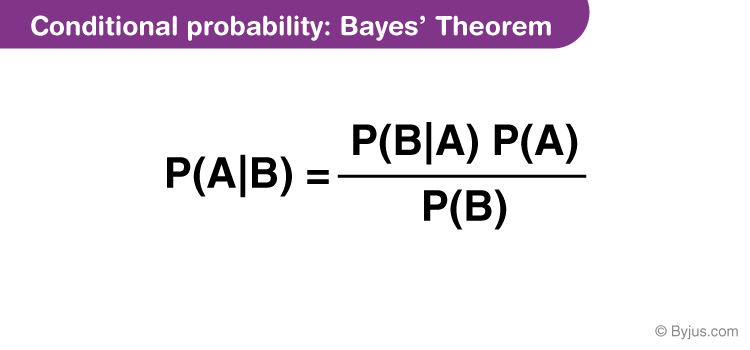
---


P(D) = probability of having the disease = 1/10000 = .0001

P(~D) = probability of not having the disease = 1- 1/10000 = .9999

P(Pos|D) = probability of testing positive given you have disease = .99

P(Neg|~D) = probability of testing negative given you don’t have disease = .99

P(D|Pos) is what we are trying to find.

P(Pos) = P(Pos|D) * P(D) + P(Pos|\~D) * P(\~D) = .0001 * .0009 + .01 * .9999 =  .009999

P(D|Pos) = P(Pos|D) * P(D) /  P(Pos) = .99 * .0001 / .009999 = .0099

.99% that you actually have the disease given that you tested positive


# Q2: Model Building

**Part 1: Data Exploration**

First, let's upload the file path of the given dataset and print the general summary of the data. Furthermore, you can check the distributions as well.

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt



noShowFile = '/content/KaggleV2-May-2016.csv'
noShowData = pd.read_csv(noShowFile)
noShowData


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


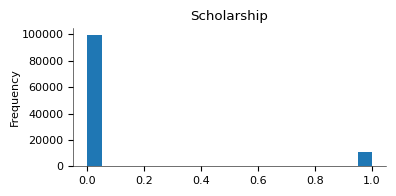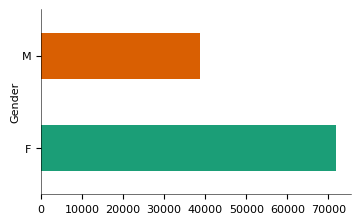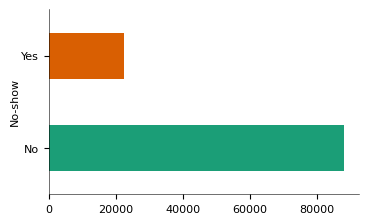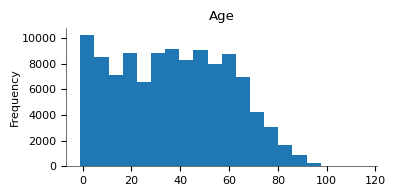

The distributions of Scholarship, Age, No-Show, and Gender are shown above.

In [ ]:
print(noShowData.describe())

          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

Most of the data values seem to be within an understandable range. However, there is an age where it is a negative value, so that must be taken into consideration. I will assume that it was an accidental input, thus I will make all negative ages positive. Furthermore, I will change the ages of 0 to 0.5 to ensure that people actually exist.

In [ ]:
noShowData["Age"] = noShowData['Age'].abs()
noShowData["Age"] = noShowData["Age"].replace({0:0.5})
noShowData.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.104902,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.084636,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Next, let's check for any null values.

In [ ]:
null = noShowData[noShowData.isnull().any(axis=1)]
null.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Due to there not being any null values, it is not necessary to impute as none of them are missing.

Next, let's explore the data further. Let's try to understand if there are any features that are not needed for the machine learning algorithm. PatientID and AppointmentID are not necessary as they do not provide any relevant information. Furthermore, I got rid of Scholarship as it logically has no effect on the no-show target variable. However, the difference between the scheduled day and appointment day is significant. I want to utilize how long the patient was scheduled for their appointment as maybe time can be related to a patient being forgetful, thus I calculate the difference.

In [ ]:
noShowData["ScheduledDay"] = pd.to_datetime(noShowData["ScheduledDay"],utc=True)
noShowData["AppointmentDay"] = pd.to_datetime(noShowData["AppointmentDay"],utc=True)
noShowData["Time Differential"] = abs(noShowData["ScheduledDay"] - noShowData["AppointmentDay"]) / 3600 / 1000000
noShowData["Time Differential"] = pd.to_numeric(noShowData["Time Differential"])
noShowData["Time Differential"]


0          18635
1          16140
2          16317
3          17491
4          16123
           ...  
110522    830740
110523    832540
110524    967935
110525    968843
110526    970484
Name: Time Differential, Length: 110527, dtype: int64

Next, let's only utilize the columns that we are interested in. Furthermore, let's encode the categorical variables, so correlation can be considered and for easier model building.

Note: I encoded Gender, No-Show, and Neighbourhood

In [ ]:
noShowData = noShowData[["Age","Neighbourhood", "Gender", "Hipertension", "Handcap", "Alcoholism","SMS_received" ,"Time Differential", "No-show"]]

label = LabelEncoder()
noShowData["Gender"] = label.fit_transform(noShowData["Gender"])
noShowData["No-show"] = label.fit_transform(noShowData["No-show"])
noShowData["Neighbourhood"] = label.fit_transform(noShowData["Neighbourhood"])
noShowData

,Age,Neighbourhood,Gender,Hipertension,Handcap,Alcoholism,SMS_received,Time Differential,No-show
0,62.0,39,0,1,0,0,0,18635,0
1,56.0,39,1,0,0,0,0,16140,0
2,62.0,45,0,0,0,0,0,16317,0
3,8.0,54,0,0,0,0,0,17491,0
4,56.0,39,0,1,0,0,0,16123,0
...,...,...,...,...,...,...,...,...,...
110522,56.0,43,0,0,0,0,1,830740,0
110523,51.0,43,0,0,0,0,1,832540,0
110524,21.0,43,0,0,0,0,1,967935,0
110525,38.0,43,0,0,0,0,1,968843,0


 Next, let's show the correlation matrix to see if there are any relations that should be taken into consideration. This will show if we need to take out any highly correlated data columns.

In [ ]:
correlation = noShowData.corr()
print(correlation)

                        Age  Neighbourhood    Gender  Hipertension   Handcap  \
Age                1.000000      -0.016306 -0.106320      0.504801  0.078025   
Neighbourhood     -0.016306       1.000000 -0.008058      0.004323  0.010990   
Gender            -0.106320      -0.008058  1.000000     -0.055718  0.022814   
Hipertension       0.504801       0.004323 -0.055718      1.000000  0.080083   
Handcap            0.078025       0.010990  0.022814      0.080083  1.000000   
Alcoholism         0.095794      -0.000010  0.106167      0.087971  0.004648   
SMS_received       0.012557       0.018269 -0.046298     -0.006267 -0.024161   
Time Differential  0.033205      -0.001672 -0.027300     -0.018543 -0.019488   
No-show           -0.060423      -0.008962 -0.004119     -0.035701 -0.006076   

                   Alcoholism  SMS_received  Time Differential   No-show  
Age                  0.095794      0.012557           0.033205 -0.060423  
Neighbourhood       -0.000010      0.018269      

From seeing the correlation matrix, I can tell that a majority of them have no correlation between the predictors. There also seems to be relatively little correlation between the predictors and target variable. However, hipertension and age have a correlation of .50 which is considered significant, thus I will drop hipertension.

In [ ]:
noShowData.drop(labels="Hipertension",axis=1,inplace=True)
noShowData

,Age,Neighbourhood,Gender,Handcap,Alcoholism,SMS_received,Time Differential,No-show
0,62.0,39,0,0,0,0,18635,0
1,56.0,39,1,0,0,0,16140,0
2,62.0,45,0,0,0,0,16317,0
3,8.0,54,0,0,0,0,17491,0
4,56.0,39,0,0,0,0,16123,0
...,...,...,...,...,...,...,...,...
110522,56.0,43,0,0,0,1,830740,0
110523,51.0,43,0,0,0,1,832540,0
110524,21.0,43,0,0,0,1,967935,0
110525,38.0,43,0,0,0,1,968843,0


Now, let's split our data into training sets and validation sets.

In [ ]:
y = noShowData["No-show"]
x = noShowData.drop(["No-show"],axis=1)
x_train, x_valid, y_train, y_valid = train_test_split(x,y, train_size = 0.8, test_size=0.2, random_state=1)

**Part 2: Decision Tree, Random Forest, Logistic Regression**

Let's build our 3 models and compare.

**DECISION TREE CLASSIFIER**

After building the model with a max_depth of 10 and developing the MAE scores for the cross validation, I plotted the graph and printed out the metrics and AUC score.

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     17690
           1       0.40      0.03      0.06      4416

    accuracy                           0.80     22106
   macro avg       0.60      0.51      0.47     22106
weighted avg       0.72      0.80      0.72     22106

MAE scores:  [0.20636931 0.20510269 0.20700262 0.20781688 0.2094454  0.22817335
 0.21333575 0.20846906 0.20530221 0.20711183]
AUC-ROC Score:  0.7086716247409082


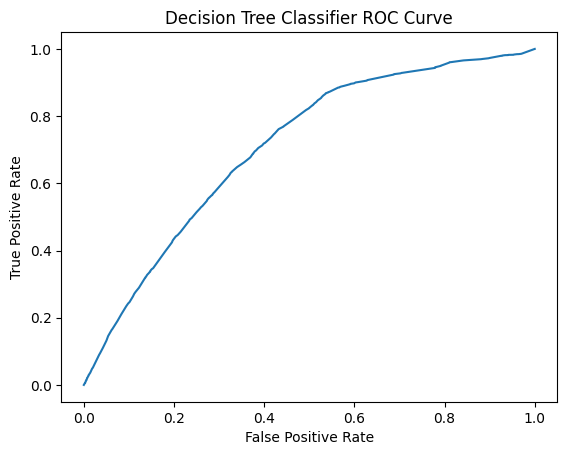

In [ ]:
#Decision Tree
dtr = DecisionTreeClassifier(max_depth = 10,random_state=1)
scores= -1 * cross_val_score(dtr,x,y,cv=10, scoring='neg_mean_absolute_error')

dtr.fit(x_train,y_train)
predicted = dtr.predict(x_valid)
report = classification_report(y_valid,predicted,zero_division= 0)
print(report)
print("MAE scores: ", scores)

predicted = dtr.predict_proba(x_valid)[:, 1]
fpr,tpr ,_ = metrics.roc_curve(y_valid,predicted)
plt.plot(fpr,tpr)
plt.title("Decision Tree Classifier ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
roc_auc = roc_auc_score(y_valid,predicted)
print("AUC-ROC Score: ", roc_auc)
plt.show()

**RANDOM FOREST CLASSIFIER**

After building the model with a max_depth of 10 with 100 estimators and developing the MAE scores for the cross validation, I plotted the graph and printed out the metrics and AUC score.

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17690
           1       0.76      0.00      0.01      4416

    accuracy                           0.80     22106
   macro avg       0.78      0.50      0.45     22106
weighted avg       0.79      0.80      0.71     22106

MAE scores:  [0.20157423 0.20193613 0.20220755 0.20148376 0.20139329 0.21740704
 0.20256944 0.2019544  0.2019544  0.20249729]
AUC-ROC Score:  0.7261244825845273


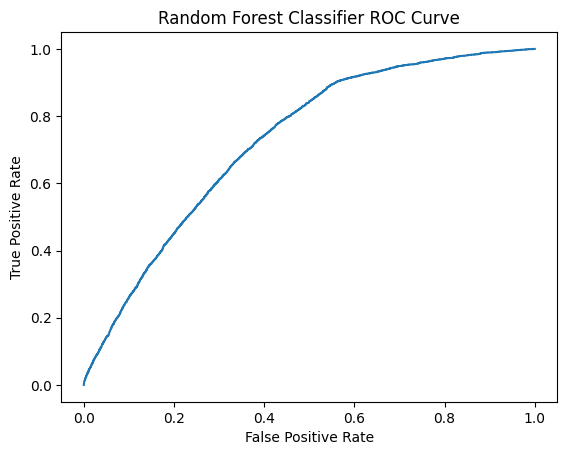

None


In [ ]:
#RandomForest
rfr = RandomForestClassifier(n_estimators=100, max_depth = 10, random_state=1)
scores = -1 * cross_val_score(rfr,x,y,cv=10,scoring = 'neg_mean_absolute_error')

rfr.fit(x_train,y_train)
predicted = rfr.predict(x_valid)
report = classification_report(y_valid,predicted,zero_division= 0)
print(report)
print("MAE scores: ",scores)

predicted = rfr.predict_proba(x_valid)[:, 1]
fpr,tpr ,_ = metrics.roc_curve(y_valid,predicted)
plt.plot(fpr,tpr)
plt.title("Random Forest Classifier ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
roc_auc = roc_auc_score(y_valid,predicted)
print("AUC-ROC Score: ", roc_auc)

print(plt.show())

**LOGISTIC REGRESSION**

After building the model and developing the MAE scores for the cross validation, I plotted the graph and printed out the metrics and AUC score.

              precision    recall  f1-score   support

           0       0.80      0.98      0.88     17690
           1       0.36      0.04      0.07      4416

    accuracy                           0.79     22106
   macro avg       0.58      0.51      0.48     22106
weighted avg       0.71      0.79      0.72     22106

MAE scores:  [0.20998824 0.20193613 0.20754546 0.20600742 0.20465032 0.22754003
 0.19605537 0.20991676 0.20448788 0.20620702]
AUC-ROC Score:  0.5837808746753672


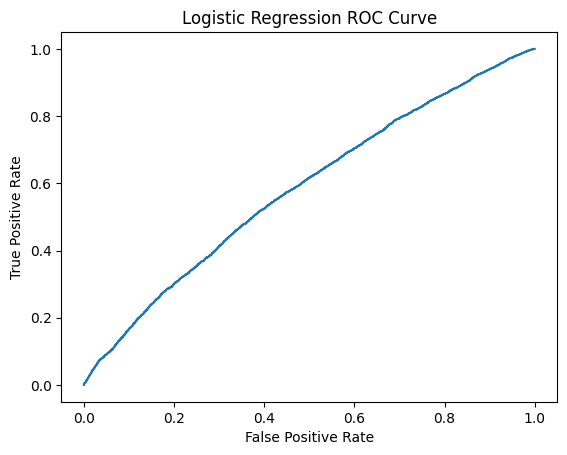

In [ ]:
D#Logistic Regression
lr = LogisticRegression(random_state=1)
scores = -1 * cross_val_score(lr,x,y,cv=10, scoring = 'neg_mean_absolute_error')

lr.fit(x_train,y_train)
predicted = lr.predict(x_valid)
report = classification_report(y_valid,predicted,zero_division= 0)
print(report)
print("MAE scores: ",scores)

predicted = lr.predict_proba(x_valid)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_valid, predicted)
plt.plot(fpr,tpr)
plt.title("Logistic Regression ROC Curve")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
roc_auc = roc_auc_score(y_valid,predicted)
print("AUC-ROC Score: ", roc_auc)
plt.show()


**Conclusion/Possible Improvements to Classifiers**

Based on my findings, the best model is the random forest classifier. I believe this is due to how it independently selects the best feature when deciding to branch off. It has better feature selection compared to Logistic Regression and Decision Tree Classifier. Although all the classifier models had consistent MAE scores, the Random Forest Classifier had a better AUC score and overall accuracy.

I believe that multiple improvements can be made for the models. First, although I took in consideration the difference of Scheduled Day and Appointment Day, I took the absolute value as it returned negative values when it should only return positive values. Thus, a possible improvement could be to delete those rows. Another possible improvement would to make the training set's target variable to be normalized. Since there is a significant difference between the number of people who were No-Shows and not No-Shows, the training set may benefit from having a more even variance. This will allow for better decisions built by the models.

# Q3: Problem Formulation

To transform the regression model to a **binary** classification model, I would label the plots differently. I would have a more categorical target feature rather than a numerical feature. For example, I would change the length of stay (in days), and split them into ranges such as (Short:1-5 days and Long: 6-10 days) Essentially binning the results. By doing so, it will predict a categorical feature rather than fit the model in a regression format. However, due to the data being skewed towards 0-2 days, it would be ideal to have Short be classified between 0-2 days and Long 3-10 days.
